In [1]:
#Importing the python libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

#Set the max columns and rows
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',150)

In [2]:
#Import the data set
data = pd.read_csv("application_data.csv")
data.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
#Check the structure of dataset
print("Shape of the dataset: ",data.shape)
print("Data types of the dataset: \n",data.dtypes)

Shape of the dataset:  (307511, 122)
Data types of the dataset: 
 SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE

In [4]:
#Check the percentage of missing values in each column
data.isnull().sum()/len(data)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [5]:
#Drop the columns which have more the 50% missing values
df = pd.DataFrame((data.isnull().sum()/len(data)*100)>50)
df_drop = df[df[0]==True].index
data = data.drop(df_drop, axis=1)
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,

In [6]:
data[data.CNT_FAM_MEMBERS.isna() == True]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,NaN,NaN,Commercial associate,Lower secondary,Unknown,Municipal apartment,0.015221,-12396,-1161,-3265.0,-4489,1,1,1,1,1,0,Managers,NaN,2,2,THURSDAY,15,0,1,1,0,1,1,Insurance,0.700618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,3.0,0.0,-876.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,NaN,NaN,Commercial associate,Higher education,Unknown,House / apartment,0.031329,-12844,-232,-1597.0,-1571,1,1,0,1,0,0,Accountants,NaN,2,2,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 2,0.645168,0.670652,0.997,0.375,0.997,0.375,0.997,0.375,0.0791,No,1.0,0.0,1.0,0.0,-654.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [8]:
data.CNT_FAM_MEMBERS.fillna(0, inplace = True)

### Replaced nulls in CNT_FAM_MEMBERS with 0 [ Assumption : there may not be any family memebers present. Note : Family Status is Unknown ] 

In [81]:
data[data.AMT_ANNUITY.isna() == True]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,YEARS_BEGINEXPLUATATION_AVG,Age,Income,AMT_CREDIT_BIN,AMT_INCOME_BIN


In [10]:
###For the NaNs in AMT_ANNUITY since we have very low count, we replaced it with the mean.

data.AMT_ANNUITY.fillna(data.AMT_ANNUITY.mean(), inplace = True)

In [11]:
data[data.DAYS_LAST_PHONE_CHANGE.isna() == True]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
15709,118330,0,Cash loans,M,Y,Y,0,126000.0,278613.0,25911.0,252000.0,Unaccompanied,Working,Incomplete higher,Married,House / apartment,0.010643,-8574,-293,-4790.0,-1075,0,1,0,1,0,0,NaN,2.0,2,2,FRIDAY,13,0,0,0,0,0,0,Trade: type 3,NaN,NaN,0.993,0.375,0.993,0.375,0.993,0.375,0.1067,No,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [13]:
data[data.DAYS_LAST_PHONE_CHANGE == 0]['DAYS_LAST_PHONE_CHANGE'].count()

37672

In [14]:
data.DAYS_LAST_PHONE_CHANGE.fillna(0, inplace = True)

**In DAYS_LAST_PHONE_CHANGE column ====> only one record has null value so replaced it with 0.**

In [15]:
data[data.NAME_TYPE_SUITE.isna() == True].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
64,100076,0,Cash loans,M,Y,N,0,180000.0,315000.0,9679.5,315000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.028663,-13866,-2546,-5448.0,-4097,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,12,0,0,0,0,0,0,Transport: type 3,0.584887,0.095070,0.9677,0.0417,0.9677,0.0417,0.9677,0.0417,0.0079,No,0.0,0.0,0.0,0.0,-3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,NaN,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.024610,-10072,-381,-519.0,-1834,1,1,1,1,0,0,Core staff,4.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Kindergarten,0.378174,NaN,0.9791,0.0417,0.9791,0.0417,0.9791,0.0417,0.0079,No,2.0,1.0,2.0,1.0,-2011.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1199,101414,0,Cash loans,M,Y,N,0,135000.0,533668.5,34636.5,477000.0,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,0.046220,-21717,-2393,-5486.0,-4513,1,1,0,1,0,0,NaN,2.0,1,1,SUNDAY,10,0,0,0,0,0,0,Transport: type 3,0.756676,0.544235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,3.0,0.0,-3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,4.0,0.0,0.0
1669,101954,0,Cash loans,F,Y,N,2,153000.0,1162170.0,30654.0,832500.0,NaN,State servant,Higher education,Separated,House / apartment,0.024610,-12975,-1839,-3896.0,-2179,1,1,0,1,1,0,Core staff,3.0,2,2,THURSDAY,12,0,0,0,0,0,0,Government,0.685813,0.528093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1862,102183,0,Cash loans,F,Y,N,0,121500.0,268659.0,13774.5,243000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.010147,-12870,-2822,-777.0,-4371,1,1,1,1,1,0,NaN,2.0,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.492076,0.178760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-326.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0


In [16]:
data.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [17]:
data.NAME_TYPE_SUITE.fillna('Unaccompanied', inplace = True)

### In NAME_TYPE_SUITE, we replaced the NaN's with the mode i.e.,'Unaccompanied'. Also, NaN ( or Unknown ) in this field is similar to Unaccompanied'

In [18]:
data[data.OCCUPATION_TYPE.isna() == True].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,0.751724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,-20417,365243,-5246.0,-2512,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.555183,0.652897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2396.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,-24827,365243,-9012.0,-3684,1,0,0,1,1,0,NaN,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,0.624305,0.669057,0.9876,0.3750,0.9876,0.3750,0.9876,0.3750,0.1640,No,0.0,0.0,0.0,0.0,-795.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
28,100033,0,Cash loans,M,Y,Y,0,270000.000,790830.0,57676.5,675000.0,Unaccompanied,State servant,Higher education,Single / not married,House / apartment,0.046220,-9994,-1796,-4668.0,-2661,1,1,0,1,0,1,NaN,1.0,1,1,WEDNESDAY,11,0,1,1,0,0,0,Military,0.685011,0.524496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-849.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
30,100035,0,Cash loans,F,N,Y,0,292500.000,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,1,1,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.9697,0.0417,0.9697,0.0417,0.9697,0.0417,0.0117,No,0.0,0.0,0.0,0.0,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0


In [19]:
data.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [20]:
data.OCCUPATION_TYPE.fillna('Others', inplace = True)

**In OCCUPATION_TYPE, we replaced the NULLS with 'Others'.**

In [21]:
#Check the datatypes of all the columns
data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [22]:
data = data.drop(['FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 
                  'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE'], axis=1)

data = data.drop(['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                  'DEF_60_CNT_SOCIAL_CIRCLE'], axis = 1)

data = data.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
                  'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
                  'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
                  'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'], axis = 1)

data = data.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1)

data = data.drop(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
                  'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], axis=1)

data = data.drop(['DAYS_LAST_PHONE_CHANGE'], axis = 1)

data = data.drop(['REGION_POPULATION_RELATIVE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 
                 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 
                  'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'], axis = 1)


In [23]:
data.shape

(307511, 31)

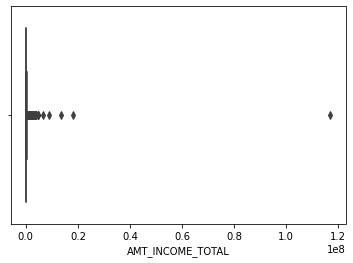

In [24]:
#Check AMT_INCOME_TOTAL for outliers
sns.boxplot(data.AMT_INCOME_TOTAL)

In [25]:
data.AMT_INCOME_TOTAL.quantile([0.25,0.5,0.75,0.99,1])

0.25       112500.0
0.50       147150.0
0.75       202500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [26]:
#Clearly there are outliers in the column and we can remove the values greater than 0.99 IQR
data = data[data['AMT_INCOME_TOTAL']<=data.AMT_INCOME_TOTAL.quantile(0.99)]

In [27]:
data.AMT_INCOME_TOTAL.quantile([0.25,0.5,0.75,0.99,1])

0.25    112500.0
0.50    144000.0
0.75    202500.0
0.99    427500.0
1.00    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

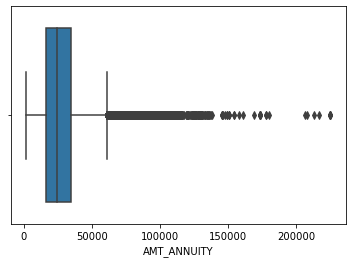

In [28]:
#Check AMT_ANNUITY for outliers
sns.boxplot(data.AMT_ANNUITY)

In [29]:
data.AMT_ANNUITY.quantile([0.25,0.5,0.75,0.95,0.99,1])

0.25     16456.5
0.50     24750.0
0.75     34371.0
0.95     52690.5
0.99     68850.0
1.00    225000.0
Name: AMT_ANNUITY, dtype: float64

In [30]:
#Clearly there are outliers in the column and we can remove the values greater than 0.99 IQR
data = data[data['AMT_ANNUITY'] <= data.AMT_ANNUITY.quantile(0.99)]

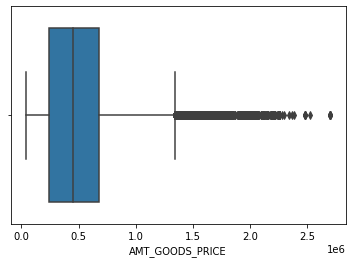

In [31]:
#Check AMT_GOODS_PRICE for outliers
sns.boxplot(data.AMT_GOODS_PRICE)

In [32]:
data.AMT_GOODS_PRICE.quantile([0.25,0.5,0.75,0.95,0.99,1])

0.25     238500.0
0.50     450000.0
0.75     679500.0
0.95    1206000.0
0.99    1620000.0
1.00    2700000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [33]:
#Clearly there are outliers in the column and we can remove the values greater than 0.99 IQR
data = data[data['AMT_INCOME_TOTAL']<=data.AMT_INCOME_TOTAL.quantile(0.99)]

In [34]:
data['DAYS_BIRTH'] = abs(data['DAYS_BIRTH'])
data['Age'] = data['DAYS_BIRTH']/365

**Checking for Data Imbalance**

In [37]:
#Check for data imbalance
data.TARGET.value_counts()/len(data)*100

0    91.837022
1     8.162978
Name: TARGET, dtype: float64

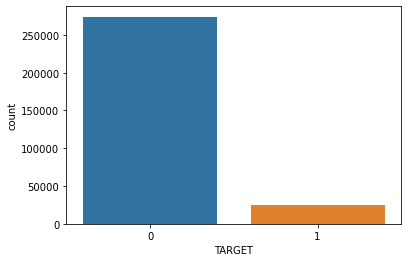

In [38]:
sns.countplot(data.TARGET)

In [39]:
# Dividing the credit amount in different bins
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

data['AMT_CREDIT_BIN']=pd.cut(data['AMT_CREDIT'],bins=bins,labels=slots)

In [40]:
# Dividing the income in different bins
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000-100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

data['AMT_INCOME_BIN']=pd.cut(data['AMT_INCOME_TOTAL'],bins,labels=slot)

**Division of Dataset based on Target column**

In [41]:
data0 = data[data['TARGET']==0]
data1 = data[data['TARGET']==1]

****Univariate Analysis****

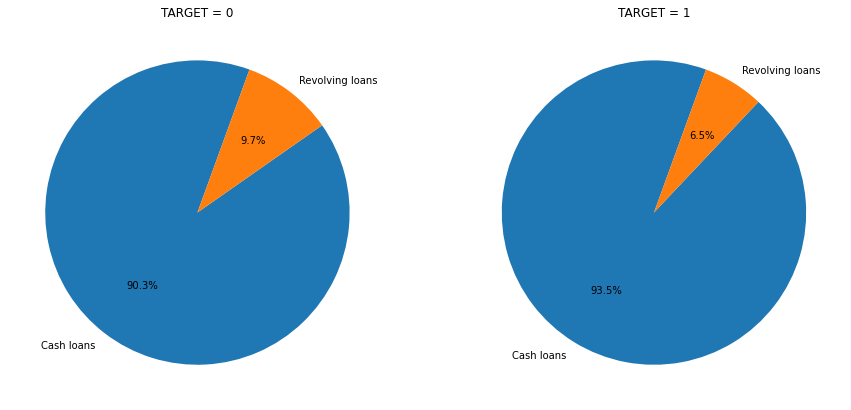

In [42]:
#NAME_CONTRACT_TYPE
plt.figure(figsize = (15,12))

plt.subplot(1,2,1)
plt.title('TARGET = 0')
plt.pie(data0.NAME_CONTRACT_TYPE.value_counts(), labels = data0.NAME_CONTRACT_TYPE.value_counts().index, startangle = 70,autopct = '%1.1f%%')

plt.subplot(1,2,2)
plt.title('TARGET = 1')
plt.pie(data1.NAME_CONTRACT_TYPE.value_counts(), labels = data1.NAME_CONTRACT_TYPE.value_counts().index,startangle = 70, autopct = '%1.1f%%')

plt.show()

`Inference` : We see that the ratio of Revolving Loans to Cash Loans is same in both the cases i.e., defaulters and non defaulters

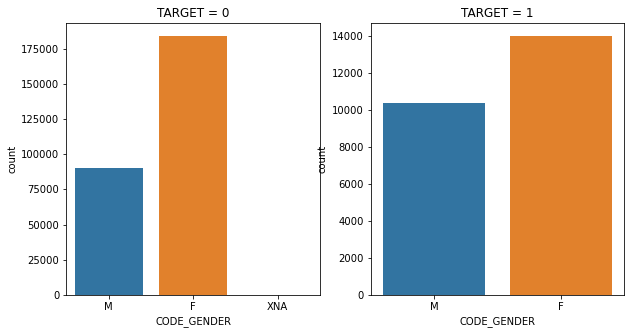

In [43]:
#CODE_GENDER

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
plt.title('TARGET = 0')
sns.countplot(x = data0.CODE_GENDER, data = data0 ,order=["M","F","XNA"])

plt.subplot(1,2,2)
plt.title('TARGET = 1')
sns.countplot(x = data1.CODE_GENDER, data = data1)
plt.show()

In [44]:
data.CODE_GENDER.value_counts()

F      197988
M      100453
XNA         4
Name: CODE_GENDER, dtype: int64

`Inference` : We see that number of females take more loans when compared to number of males.
7% of Female applicants are defaulters.
10.45% of Male applicants are defaulters.

Text(0.5, 1.0, 'Bar plot for Distribution of Applicants by Occupation')

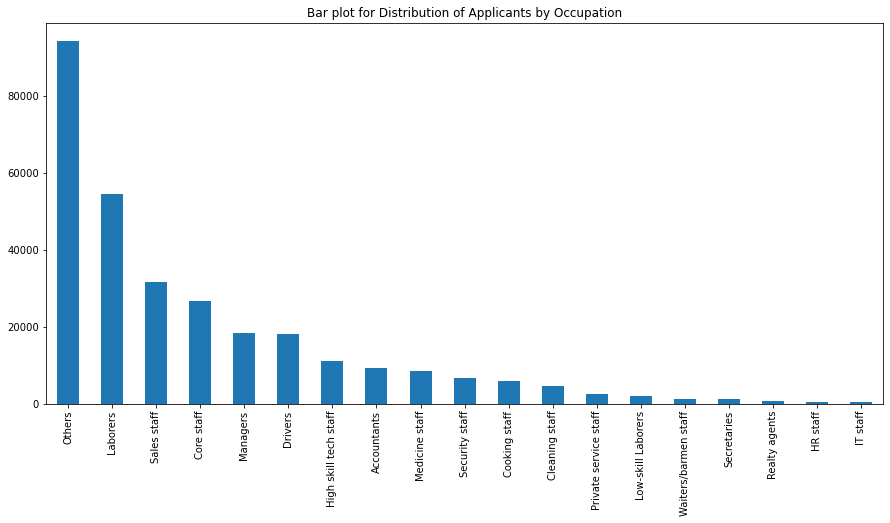

In [45]:
### Bar plot for Distribution of Applicants by occupation

fig = plt.figure(figsize=[15,7])
data['OCCUPATION_TYPE'].value_counts().sort_values(ascending=False).plot.bar()
plt.title('Bar plot for Distribution of Applicants by Occupation')

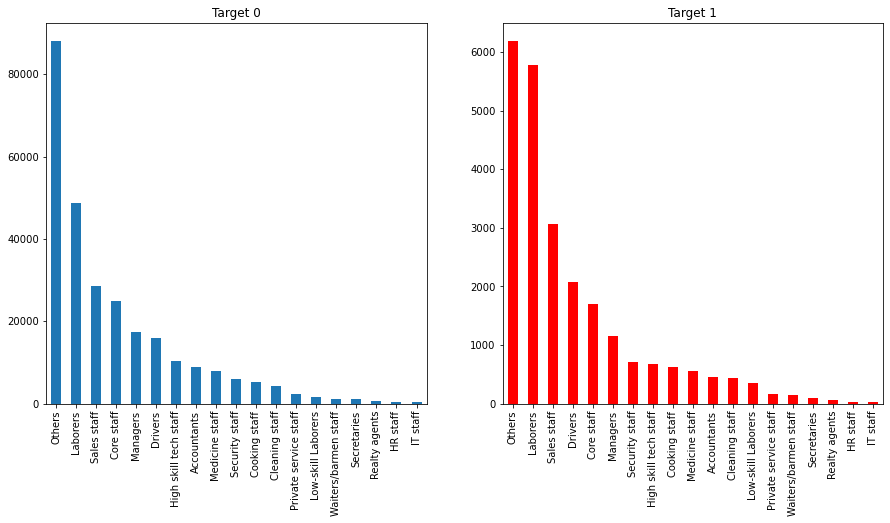

<Figure size 432x288 with 0 Axes>

In [46]:
#Univariate analysis of categorical data
fig = plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)


data0['OCCUPATION_TYPE'].value_counts().sort_values(ascending=False).plot.bar()
plt.title('Target 0')

plt.subplot(1, 2, 2)
data1['OCCUPATION_TYPE'].value_counts().sort_values(ascending=False).plot.bar(color='r')
plt.title('Target 1')
plt.show()
plt.tight_layout(fig)

`Inference` : We can see that most of the loans are taken by Labourers followed by Sales Staff, Core Staff etc. and the defaulters to non defaulters also follow the same sequence.

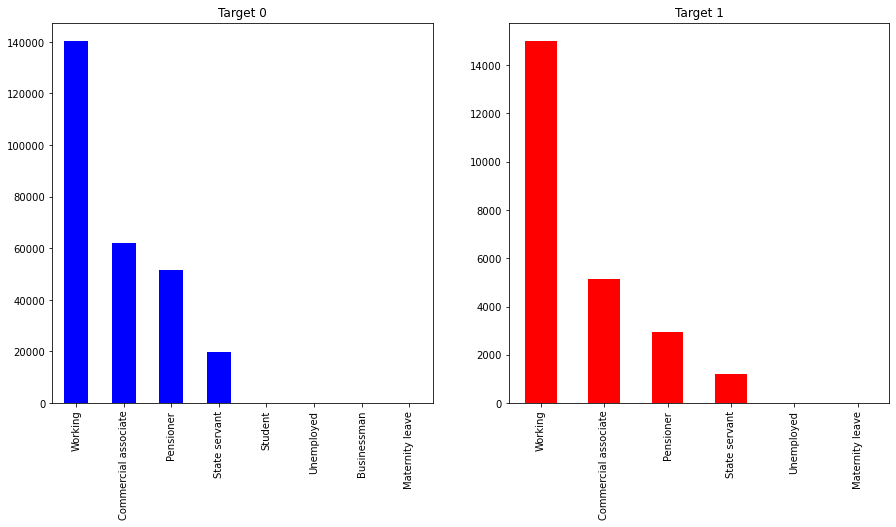

<Figure size 432x288 with 0 Axes>

In [47]:
#NAME_INCOME_TYPE 
fig = plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)


data0['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False).plot.bar(color='b')
plt.title('Target 0')

plt.subplot(1, 2, 2)
data1['NAME_INCOME_TYPE'].value_counts().sort_values(ascending=False).plot.bar(color='r')
plt.title('Target 1')
plt.show()
plt.tight_layout(fig)

We see that working professionals take most of the loans.

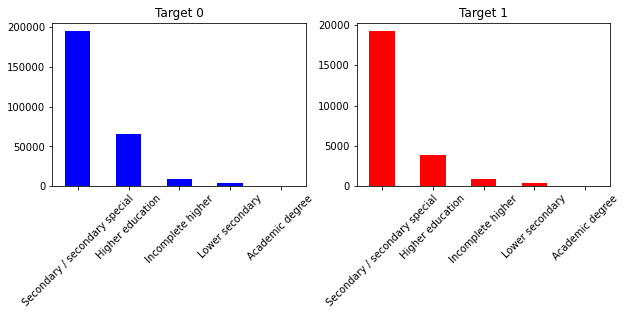

<Figure size 432x288 with 0 Axes>

In [80]:
#NAME_EDUCATION_TYPE 
fig = plt.figure(figsize=[10,3])
plt.subplot(1, 2, 1)


data0['NAME_EDUCATION_TYPE'].value_counts().sort_values(ascending=False).plot.bar(color='b')
plt.title('Target 0')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
data1['NAME_EDUCATION_TYPE'].value_counts().sort_values(ascending=False).plot.bar(color='r')
plt.title('Target 1')
plt.xticks(rotation=45)
plt.show()
plt.tight_layout(fig)

`Inference` : We see that clients with Secondary Education take most number of loans.

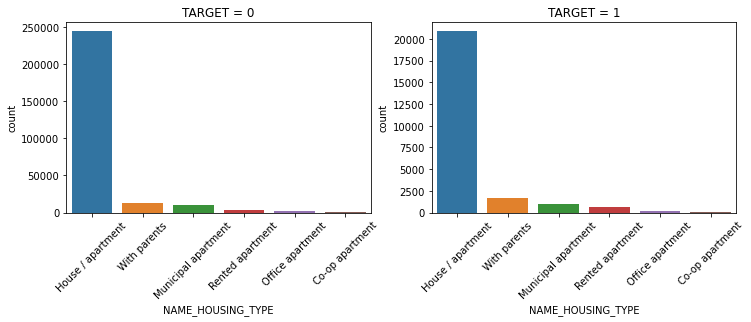

In [75]:
#NAME_HOUSING_TYPE
plt.figure(figsize = (12,3.5))

plt.subplot(1,2,1)
plt.title('TARGET = 0')
sns.countplot(x = data0.NAME_HOUSING_TYPE, data=data0 , order=data0.NAME_HOUSING_TYPE.value_counts().index)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('TARGET = 1')
sns.countplot(x = data1.NAME_HOUSING_TYPE, data=data1 , order=data0.NAME_HOUSING_TYPE.value_counts().index)
plt.xticks(rotation=45)

plt.show()

`Inference` : We also notice that most of the loans are taken by clients who have their own House/Apartments.

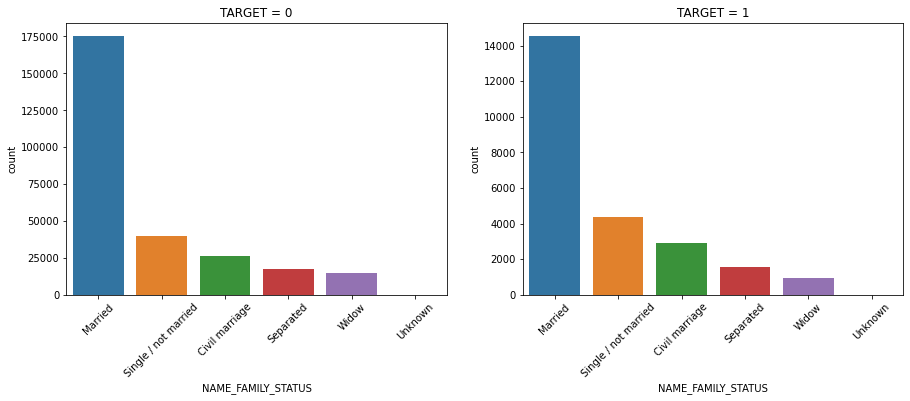

In [50]:
#NAME_FAMILY_STATUS
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('TARGET = 0')
sns.countplot(x = data0.NAME_FAMILY_STATUS,data=data0,order=data0.NAME_FAMILY_STATUS.value_counts().index)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('TARGET = 1')
sns.countplot(x = data1.NAME_FAMILY_STATUS, data=data1,order=data0.NAME_FAMILY_STATUS.value_counts().index)
plt.xticks(rotation=45)

plt.show()

`Inference` : We also notice that most of the loans are taken by clients who are married.

**Univariate - Continuous variables**

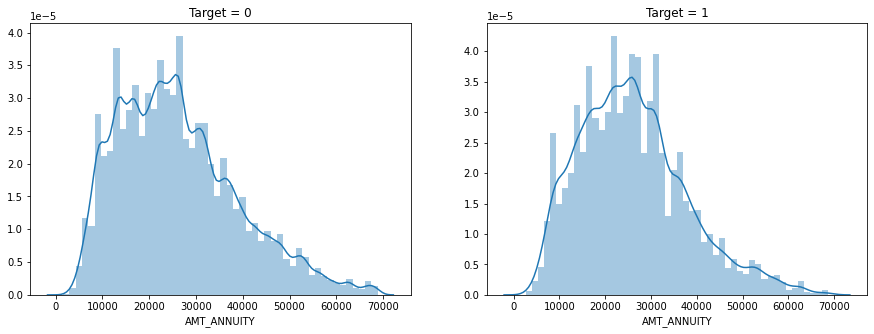

In [51]:
#AMT_ANNUITY
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Target = 0')
sns.distplot(data0.AMT_ANNUITY)

plt.subplot(1,2,2)
plt.title('Target = 1')
sns.distplot(data1.AMT_ANNUITY)
plt.show()

`Inference` : We notice that the Annuity amount data is more skewed towards left in the case of non-defaulters. Around 70% of people with low loan annuity are bound to pay their loan on time.

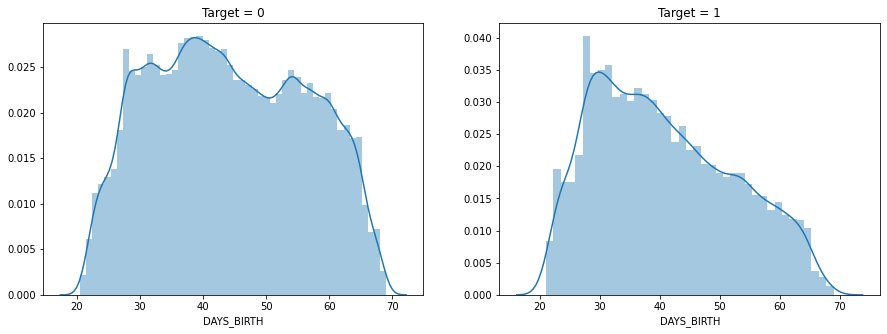

In [52]:
#DAYS_BIRTH
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Target = 0')
sns.distplot(data0.DAYS_BIRTH/365)

plt.subplot(1,2,2)
plt.title('Target = 1')
sns.distplot(data1.DAYS_BIRTH/365)
plt.show()

`Inference` : We notice that the age of applicants in the case of non-defaulters are normally distributed whereas they are left skewed in the case of defaulters. We also notice that most of the defaulters have age around 30 years and as the age increases the number of defaulters decreases.

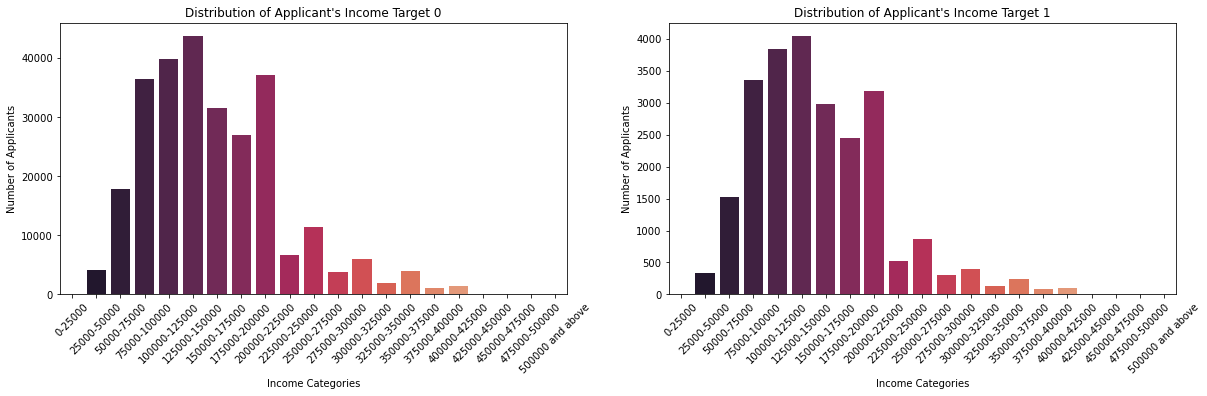

In [53]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
sns.countplot(x=data1['AMT_INCOME_BIN'],palette='rocket')
plt.title("Distribution of Applicant's Income Target 1")
plt.xlabel("Income Categories")
plt.ylabel("Number of Applicants")
plt.xticks(rotation=45)

plt.subplot(1,2,1)
sns.countplot(x=data0['AMT_INCOME_BIN'],palette='rocket')
plt.title("Distribution of Applicant's Income Target 0")
plt.xlabel("Income Categories")
plt.ylabel("Number of Applicants")
plt.xticks(rotation=45)

plt.show()

`Inference` : Most of the applicants lie between 50k and 225k income range.

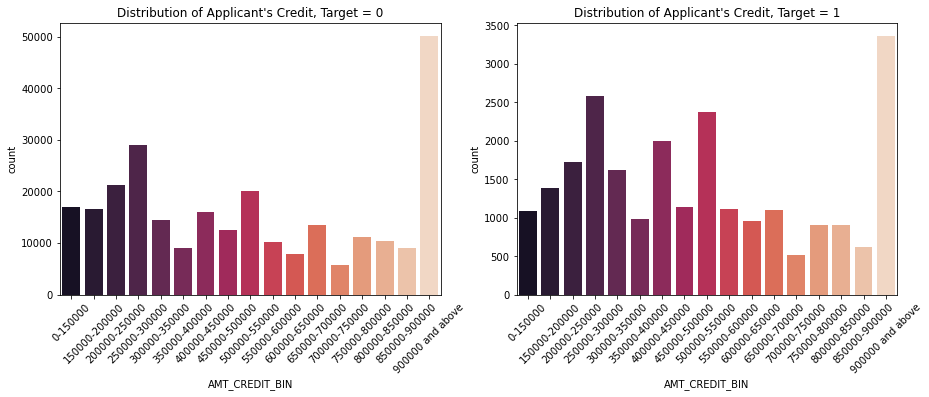

In [54]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.countplot(x=data1['AMT_CREDIT_BIN'],palette='rocket')
plt.title("Distribution of Applicant's Credit, Target = 1")

plt.xticks(rotation=45)
plt.subplot(1,2,1)
sns.countplot(x=data0['AMT_CREDIT_BIN'],palette='rocket')
plt.title("Distribution of Applicant's Credit, Target = 0")
plt.xticks(rotation=45)
plt.show()

`Inference` : In both categories, most applicants have taken the credit in the range of 250k to 300k.

### Bivariate Analysis 

**Bivariate - Continuous : Continuous**

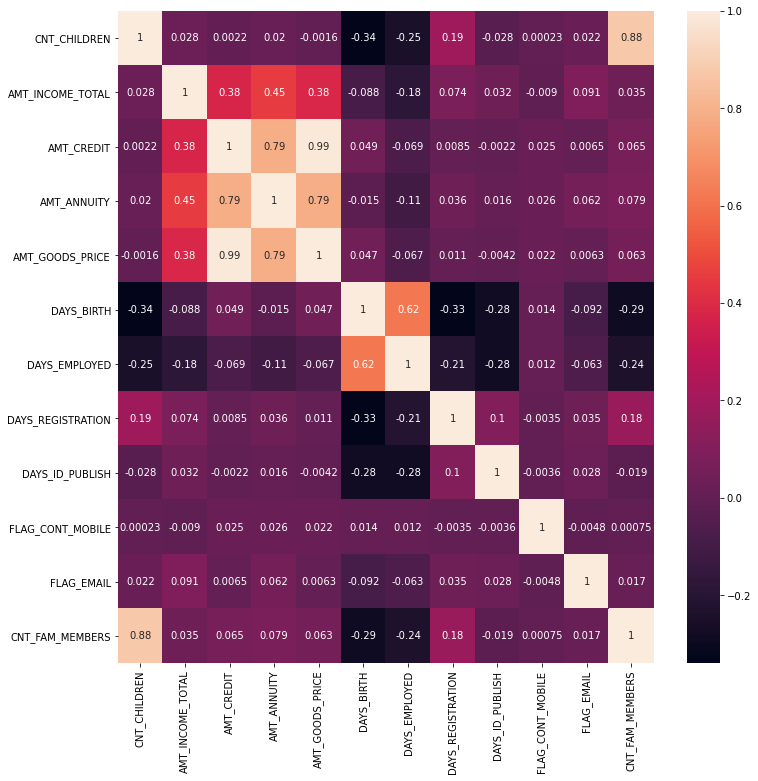

In [55]:
columnsCorr = ['CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 
               'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 
               'DAYS_ID_PUBLISH', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS']
plt.figure(figsize=(12,12))
sns.heatmap(data0[columnsCorr].corr(),annot=True)
plt.show()

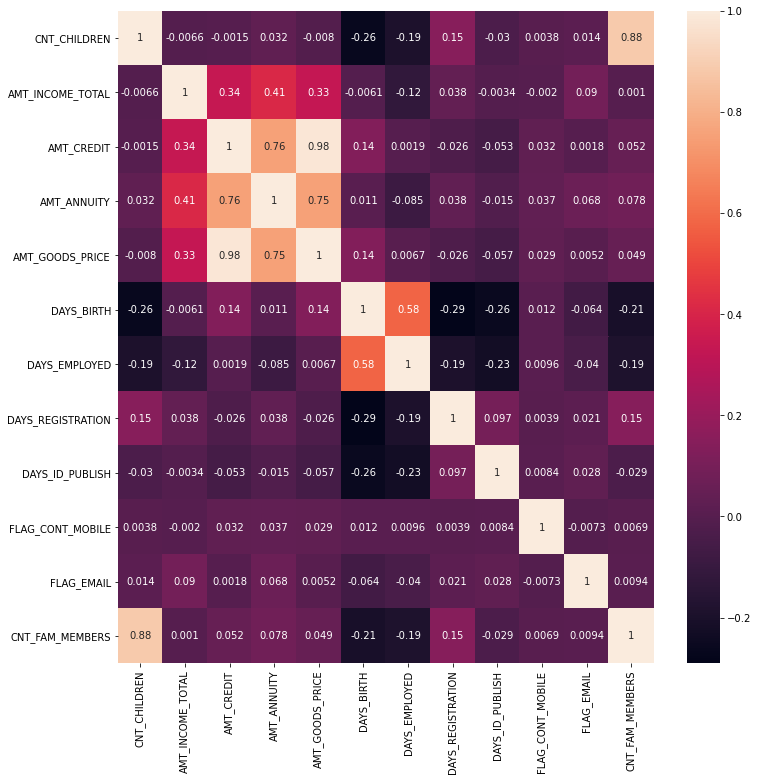

(12.5, -0.5)

In [56]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(data1[columnsCorr].corr(),annot=True)
plt.show()
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

In [57]:
corr0 = data0[columnsCorr].corr()
corr0_df = corr0.where(np.triu(np.ones(corr0.shape), k = 1).astype(np.bool))
corr0_df = corr0_df.unstack().reset_index()
corr0_df.columns = ['Variable1', 'Variable2', 'Correlation']
corr0_df.dropna(subset=['Correlation'], inplace=True)
corr0_df.Correlation = abs(corr0_df.Correlation)
corr0_df.sort_values('Correlation', ascending=False).head(10)

,Variable1,Variable2,Correlation
50,AMT_GOODS_PRICE,AMT_CREDIT,0.986413
132,CNT_FAM_MEMBERS,CNT_CHILDREN,0.877764
38,AMT_ANNUITY,AMT_CREDIT,0.788242
51,AMT_GOODS_PRICE,AMT_ANNUITY,0.787559
77,DAYS_EMPLOYED,DAYS_BIRTH,0.622116
37,AMT_ANNUITY,AMT_INCOME_TOTAL,0.450752
49,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.382775
25,AMT_CREDIT,AMT_INCOME_TOTAL,0.380674
60,DAYS_BIRTH,CNT_CHILDREN,0.339181
89,DAYS_REGISTRATION,DAYS_BIRTH,0.334466


In [58]:
corr1 = data1[columnsCorr].corr()
corr1_df = corr1.where(np.triu(np.ones(corr1.shape), k = 1).astype(np.bool))
corr1_df = corr1_df.unstack().reset_index()
corr1_df.columns = ['Variable1', 'Variable2', 'Correlation']
corr1_df.dropna(subset=['Correlation'], inplace=True)
corr1_df.Correlation = abs(corr1_df.Correlation)
corr1_df.sort_values('Correlation', ascending=False).head(10)

,Variable1,Variable2,Correlation
50,AMT_GOODS_PRICE,AMT_CREDIT,0.982296
132,CNT_FAM_MEMBERS,CNT_CHILDREN,0.884979
38,AMT_ANNUITY,AMT_CREDIT,0.756570
51,AMT_GOODS_PRICE,AMT_ANNUITY,0.753350
77,DAYS_EMPLOYED,DAYS_BIRTH,0.577713
37,AMT_ANNUITY,AMT_INCOME_TOTAL,0.411351
25,AMT_CREDIT,AMT_INCOME_TOTAL,0.335041
49,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.334250
89,DAYS_REGISTRATION,DAYS_BIRTH,0.289853
60,DAYS_BIRTH,CNT_CHILDREN,0.260357


`Inference` : 

After comparing the two data sets for Target = 1 and Target = 0, we find that the sets of correlated columns are same for both the datasets.

1. AMT_GOODS_PRICE has more effect on AMT_CREDIT than AMT_INCOME_TOTAL [ As opposed to our assumptions ]
2. CNT_FAM_MEMBERS has high corelation to CNT_CHILDREN

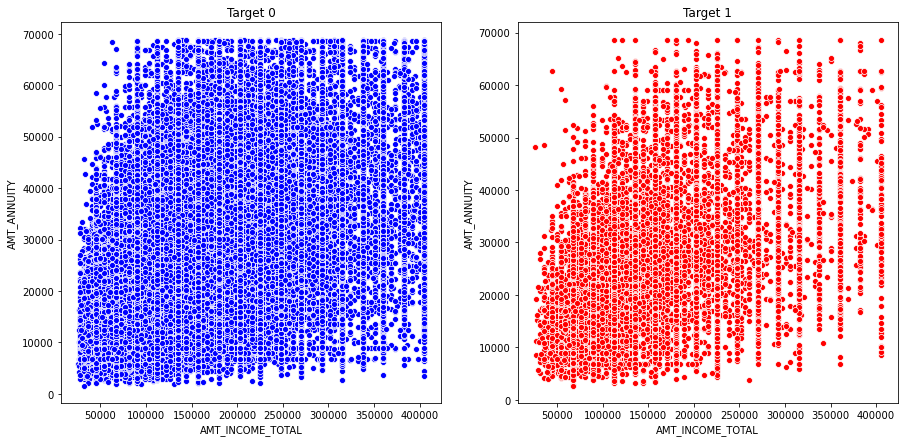

<Figure size 432x288 with 0 Axes>

In [59]:
plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)

sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_ANNUITY', data=data0, color='b')
plt.title('Target 0')

plt.subplot(1, 2, 2)
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_ANNUITY', data=data1, color='r')
plt.title('Target 1')
plt.show()
plt.tight_layout(fig)

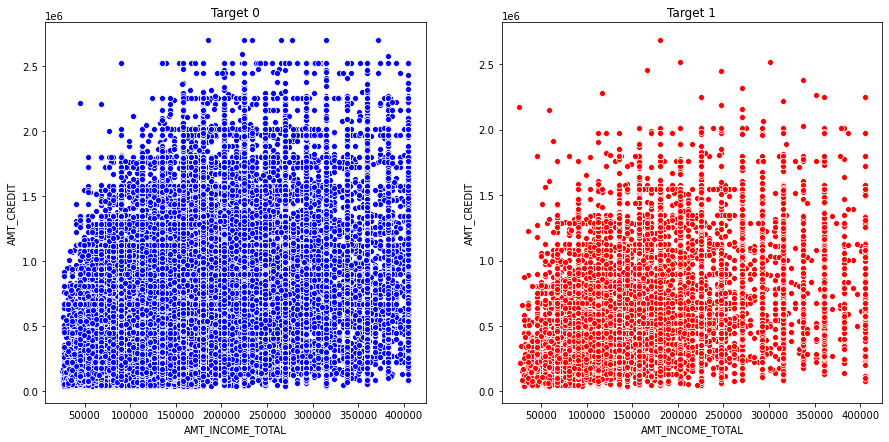

<Figure size 432x288 with 0 Axes>

In [60]:
fig = plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)


sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=data0, color='b')

plt.title('Target 0')

plt.subplot(1, 2, 2)
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=data1, color='r')
plt.title('Target 1')
plt.show()
plt.tight_layout(fig)


`Inference` : In the case of defaulters [Target 1] , Maximum loan given to people with income till 250k is around 130k.

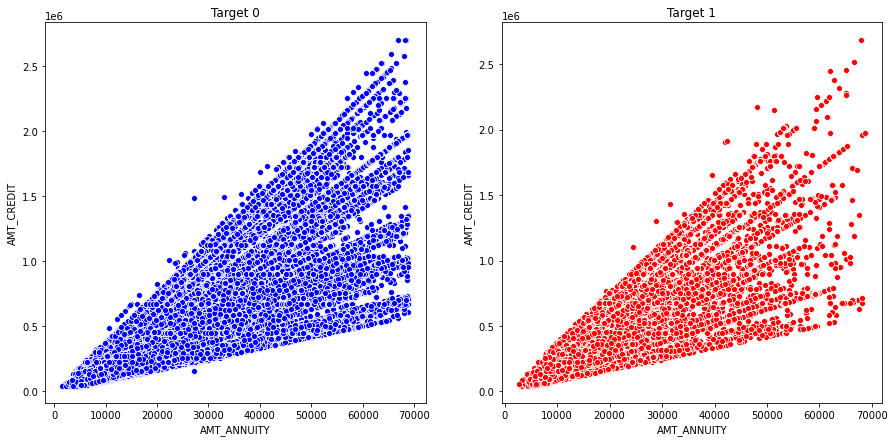

<Figure size 432x288 with 0 Axes>

In [61]:

fig = plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)
sns.scatterplot(x='AMT_ANNUITY', y='AMT_CREDIT', data=data0, color='b')
plt.title('Target 0')

plt.subplot(1, 2, 2)
sns.scatterplot(x='AMT_ANNUITY', y='AMT_CREDIT', data=data1, color='r')
plt.title('Target 1')
plt.show()
plt.tight_layout(fig)

`Inference` : 
    For the same credit amount - some applicants have lower AMT_ANNUITY,other have higher. 
    This can be due to two things :
        1) Risk Involved
        2) Tenure
        
The upper edge of the cone has the applicants with the best possible AMT_ANNUITY amounts. 
This also marks the lowest AMT_ANNUITY one could get for a particular AMT_CREDIT.

The lower edge of the cone has the applicants who were assumed to be at a greater risk of being a defaulter.
This also marks the highest AMT_ANNUITY bank can recieve from the applicants.

We notice that the applicants with higher risk are likely to be defaulters.

**Bivariate: Continuous : Categorical**

In [62]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE',
       'YEARS_BEGINEXPLUATATION_AVG', 'Age', 'Income', 'AMT_CREDIT_BIN',
       'AMT_INCOME_BIN'],
      dtype='object')

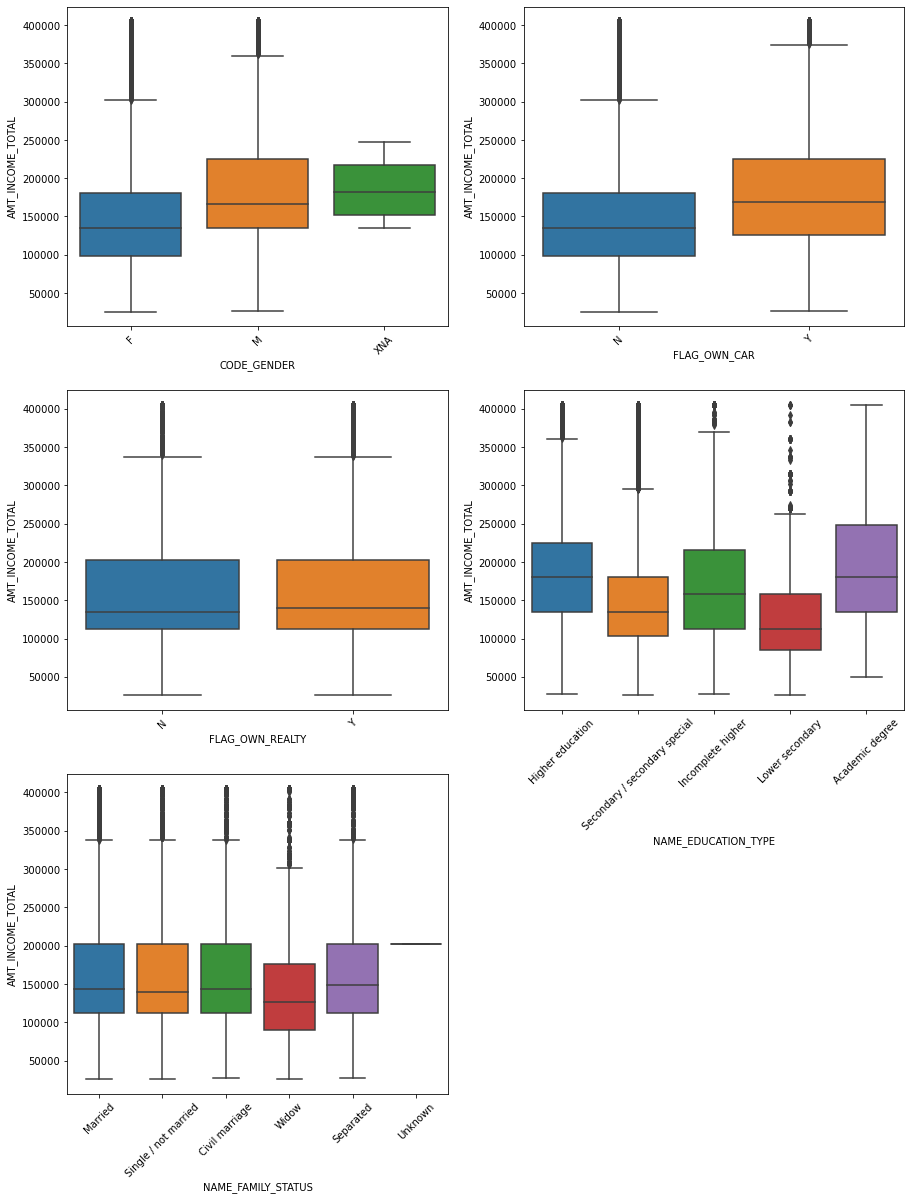

In [63]:
features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS']
plt.figure(figsize = (15,20))
for i in enumerate(features):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(x = i[1], y = data0.AMT_INCOME_TOTAL, data = data0)
    plt.xticks(rotation=45)

We notice the following from above plots:

- Females have comparitively lower income than Males and Others.
- People with comparitively higher income own the cars.
- There is no significant of income on owning a house or a flat.
- Applicants with Higher education and Academic degree have comparitively higher income than others.
- Applicants are likely to have better AMT_INCOME_TOTAL as their education level increases.
- There is no significant of income on Family Status.


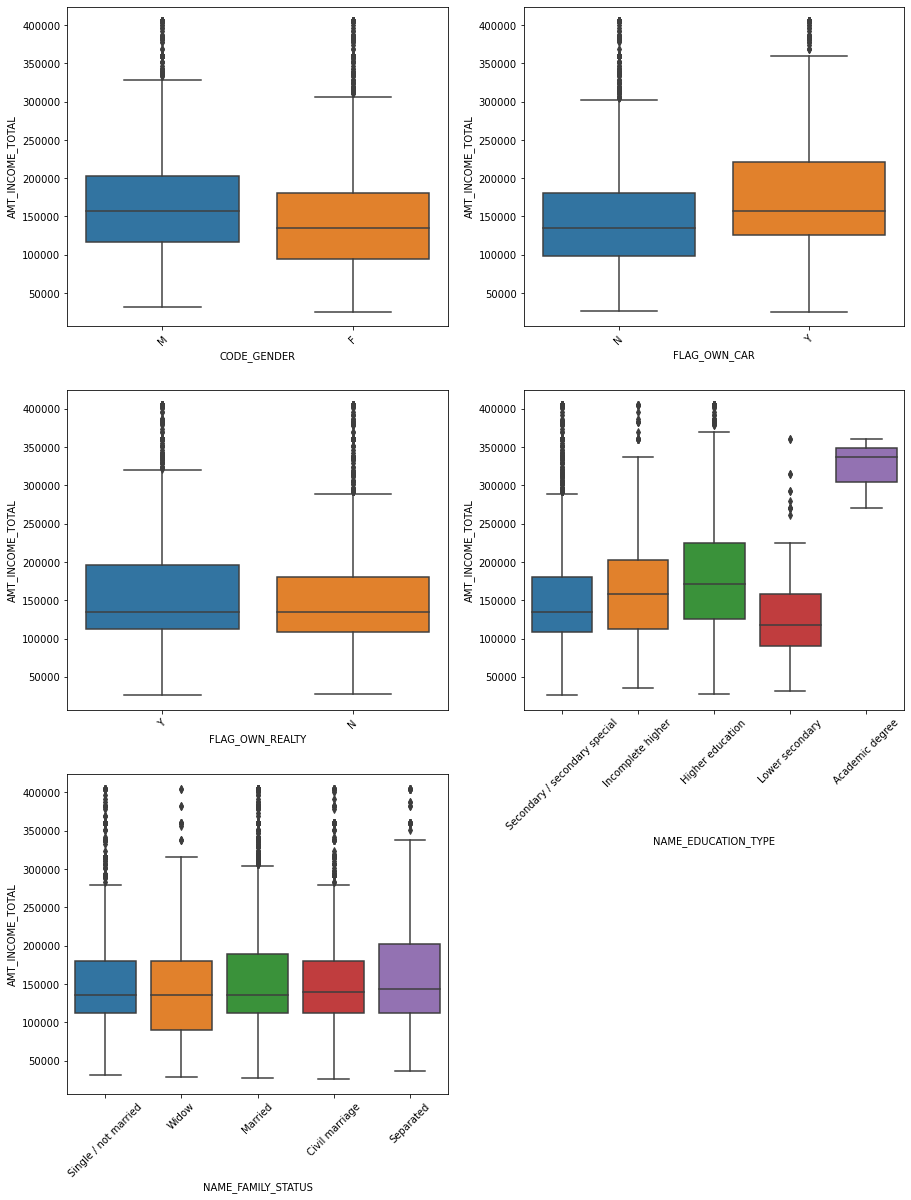

In [64]:
#### We checked and the above inferences apply to target 1 as well. 

features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS']
plt.figure(figsize = (15,20))
for i in enumerate(features):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(x = i[1], y = data1.AMT_INCOME_TOTAL, data = data1)
    plt.xticks(rotation=45)

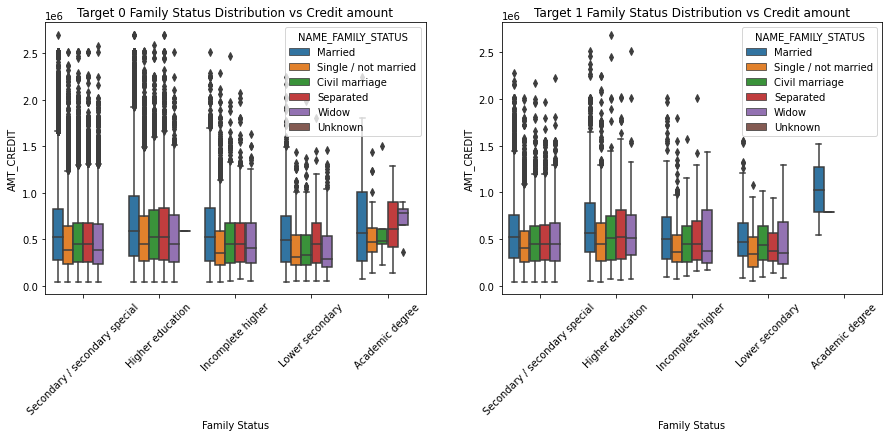

In [65]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.boxplot(x=data1['NAME_EDUCATION_TYPE'],y=data1['AMT_CREDIT'],hue=data1['NAME_FAMILY_STATUS'],hue_order=data['NAME_FAMILY_STATUS'].value_counts().index,order=data['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title('Target 1 Family Status Distribution vs Credit amount')
plt.xlabel('Family Status')
plt.xticks(rotation=45)

plt.subplot(1,2,1)
sns.boxplot(x=data0['NAME_EDUCATION_TYPE'],y=data0['AMT_CREDIT'],hue=data0['NAME_FAMILY_STATUS'],hue_order=data['NAME_FAMILY_STATUS'].value_counts().index,order=data['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title('Target 0 Family Status Distribution vs Credit amount')
plt.xlabel('Family Status')
plt.xticks(rotation=45)

plt.show()

`Inference` : It is clearly visible that married applicants are more likely to be defaulters than other categories in NAME_FAMILY_STATUS

**Bivariate: Categorical : Categorical**

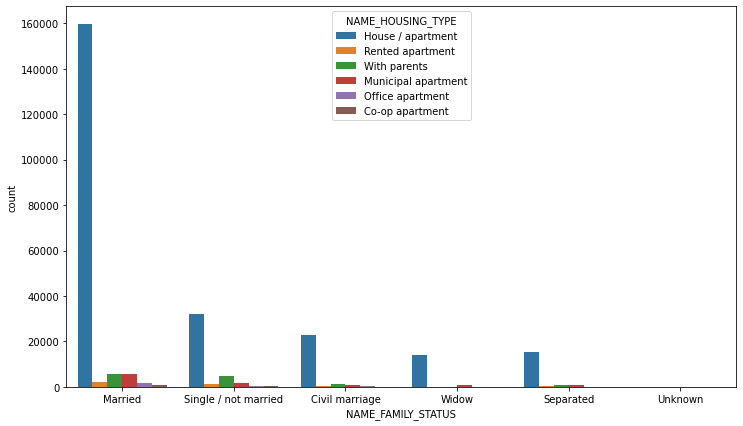

In [66]:
plt.figure(figsize=(12,7))
sns.countplot(x = data0.NAME_FAMILY_STATUS, hue = data0.NAME_HOUSING_TYPE, data=data0)


`Inference`: Most of the clients own a house/apartment irrespective of their family status. 

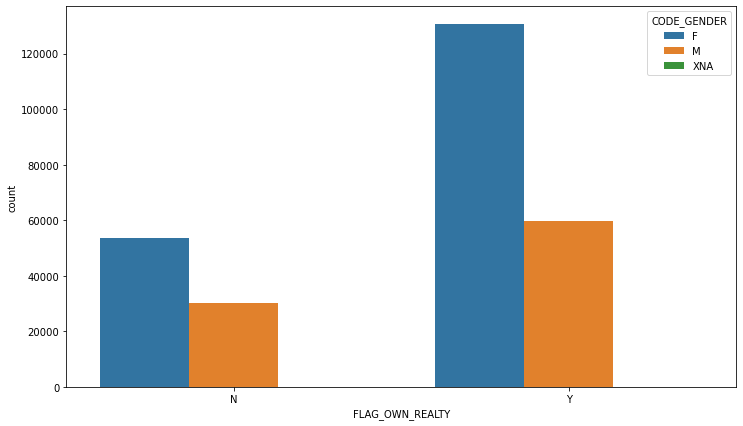

In [67]:
plt.figure(figsize=(12,7))
sns.countplot(x = data0.FLAG_OWN_REALTY, hue = data0.CODE_GENDER, data=data0)


`Inference`: Most of the female applicants own a house or apartment when compared to male applicants.

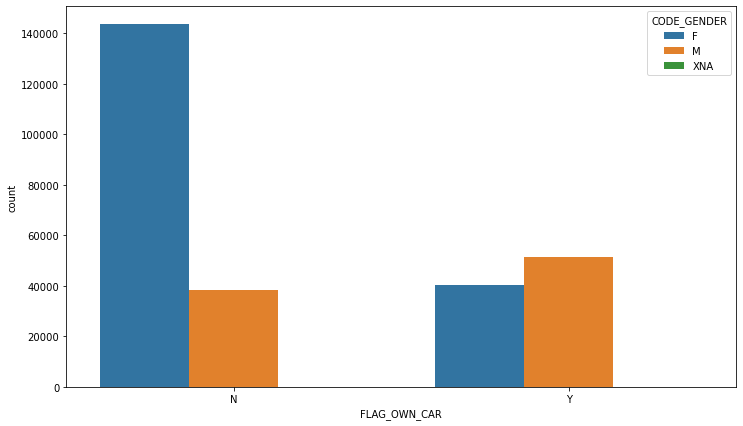

In [68]:
plt.figure(figsize=(12,7))
sns.countplot(x = data0.FLAG_OWN_CAR, hue = data0.CODE_GENDER, data=data0)

`Inference`: We notice that most of the female clients dont own a car when compared to male clients.

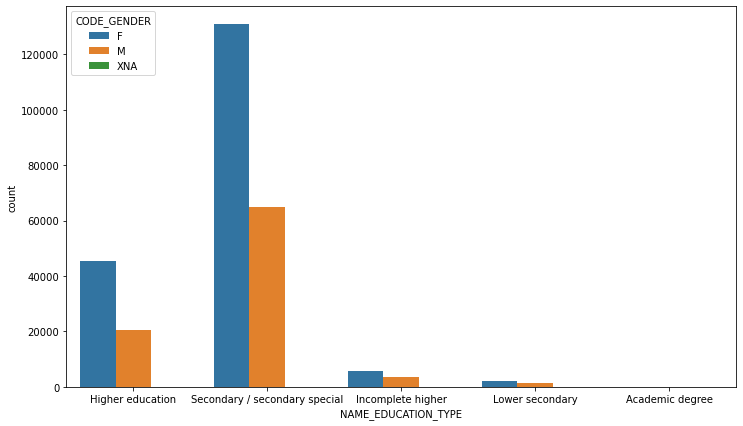

In [69]:
plt.figure(figsize=(12,7))
sns.countplot(x = data0.NAME_EDUCATION_TYPE, hue = data0.CODE_GENDER, data=data0)

`Inference` : Clearly female applicants lead in the area of education when compared to male clients be it any level of education.

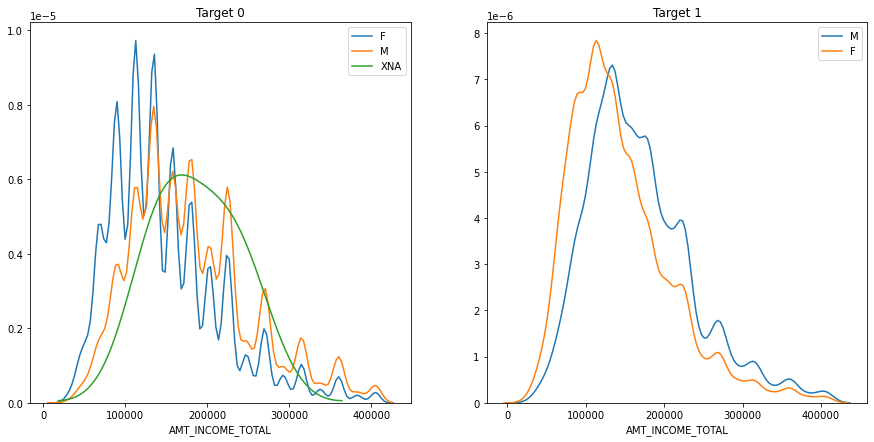

<Figure size 432x288 with 0 Axes>

In [70]:
fig = plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)
for i in data0['CODE_GENDER'].unique():
    subset=data0[data0['CODE_GENDER']==i]
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False, label=i)
plt.title('Target 0')


plt.subplot(1, 2, 2)
for i in data1['CODE_GENDER'].unique():
    subset=data1[data1['CODE_GENDER']==i]
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False, label=i)
    
plt.title('Target 1')
plt.show()
plt.tight_layout(fig)

We notice that the clients with income between 50000 & 250000 take most of the loans and most of the defaulters are also from the same range across all genders.

In [73]:
prev_app = pd.read_csv("previous_application.csv")

MemoryError: Unable to allocate 204. MiB for an array with shape (16, 1670214) and data type object

In [ ]:
appT1previous=data1.merge(prev_app,on='SK_ID_CURR', how='left' )
appT0previous=data0.merge(prev_app,on='SK_ID_CURR', how='left' )

In [ ]:
appT0previous.shape

In [ ]:
appT1previous.head()

In [ ]:
#since no null in previous application NAME_CONTRACT_STATUS. We can assume that where ever we encounter na,that means no previous record found
appT1previous.NAME_CONTRACT_STATUS=appT1previous.NAME_CONTRACT_STATUS.fillna('No History')
appT0previous.NAME_CONTRACT_STATUS=appT0previous.NAME_CONTRACT_STATUS.fillna('No History')

In [ ]:
#Current customers, previous loan status 
fig=plt.figure(figsize=(12,7))
plt.subplot(1,2,2)
bbc=sns.countplot(x='NAME_CONTRACT_STATUS', data=appT1previous)
bbc.set_xticklabels(bbc.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Target 1')

plt.subplot(1,2,1)
ddc=sns.countplot(x='NAME_CONTRACT_STATUS', data=appT0previous)
ddc.set_xticklabels(ddc.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Target 0')
plt.show()



In [ ]:
#previous status and median credit

fig=plt.figure(figsize=(13,7))

plt.subplot(1,2,1)
bbc=sns.barplot(x='NAME_CONTRACT_STATUS',y='AMT_CREDIT_y', estimator=np.median,hue='TARGET', data=appT1previous)
bbc.set_xticklabels(bbc.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Target 1')

plt.subplot(1,2,2)
ddc=sns.barplot(x='NAME_CONTRACT_STATUS',y='AMT_CREDIT_y', estimator=np.median, hue='TARGET', data=appT0previous)
ddc.set_xticklabels(ddc.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Target 0')
plt.show()


In [ ]:
#checking 
appT1previous.groupby('NAME_CONTRACT_STATUS').aggregate(np.median)['AMT_CREDIT_y']

In [ ]:
#checking the cause of rejection in previous applications
#
fig=plt.figure(figsize=(6,5))

plt.subplot(1,2,1)
subset=appT1previous[appT1previous['NAME_CONTRACT_STATUS']=='Refused']
appT1previous.CODE_REJECT_REASON.value_counts(normalize=True).plot.bar(color='blue')
plt.title('Target 1')

plt.subplot(1,2,2)
subset=appT0previous[appT0previous['NAME_CONTRACT_STATUS']=='Refused']

appT0previous.CODE_REJECT_REASON.value_counts(normalize=True).plot.bar(color='red')
plt.title('Target 0')


In [ ]:
#bivariate analysis - checking the amount asked while filling the application vs the final credit amount 

plt.figure(figsize=(12,7))
plt.subplot(1,2,2)
bbc=sns.scatterplot(x='AMT_APPLICATION',y='AMT_CREDIT_y', data=appT1previous)
bbc.set_xticklabels(bbc.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Target 1')

plt.subplot(1,2,1)
ddc=sns.scatterplot(x='AMT_APPLICATION',y='AMT_CREDIT_y', data=appT0previous)
ddc.set_xticklabels(ddc.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Target 0')
plt.show()

In [ ]:
#Shift in contract type (previous to current)


fig=plt.figure(figsize=(12,7))

plt.subplot(1,2,2)
bbc=sns.countplot(x='NAME_CONTRACT_TYPE_x',hue='NAME_CONTRACT_TYPE_y', data=appT1previous)
bbc.set_xticklabels(bbc.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Target 1')

plt.subplot(1,2,1)
ddc=sns.countplot(x='NAME_CONTRACT_TYPE_x',hue='NAME_CONTRACT_TYPE_y', data=appT0previous)
ddc.set_xticklabels(ddc.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Target 0')
plt.show()